In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
from datasets import load_dataset
from adjustText import adjust_text

# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
df['job_skills'] = df['job_skills'].apply(lambda skill_li: ast.literal_eval(skill_li) if pd.notna(skill_li) else skill_li)


In [43]:
df_da_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'India')].copy()

df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']}
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']}
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']}
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['..."


In [44]:
df_da_us = df_da_us.dropna(subset='salary_year_avg')
df_da_exp = df_da_us.explode('job_skills')

df_da_exp

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,python,"{'analyst_tools': ['tableau'], 'libraries': ['..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,r,"{'analyst_tools': ['tableau'], 'libraries': ['..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,c++,"{'analyst_tools': ['tableau'], 'libraries': ['..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,tensorflow,"{'analyst_tools': ['tableau'], 'libraries': ['..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,tableau,"{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,r,"{'analyst_tools': ['power bi'], 'cloud': ['dat..."
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,python,"{'analyst_tools': ['power bi'], 'cloud': ['dat..."
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,sql,"{'analyst_tools': ['power bi'], 'cloud': ['dat..."
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,databricks,"{'analyst_tools': ['power bi'], 'cloud': ['dat..."


In [51]:
df_da_skills = df_da_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(ascending=False,by='count')

df_da_skills = df_da_skills.rename(columns={'count':'skill_count','median':'median_salary'})

df_da_skills

df_da_count = len(df_da_us)

df_da_skills['skill_percent'] = df_da_skills['skill_count']/ df_da_count *100

skill_percent = 9


df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]


df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,64,152500.00,69.565217
sql,49,113500.00,53.260870
r,30,129758.00,32.608696
spark,23,93600.00,25.000000
aws,20,103550.00,21.739130
tableau,19,113500.00,20.652174
tensorflow,16,136008.00,17.391304
azure,15,157500.00,16.304348
hadoop,14,87717.75,15.217391


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


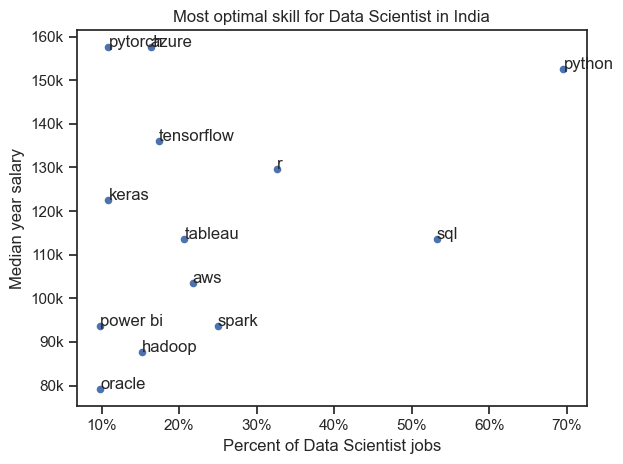

In [52]:

df_da_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

for i, txt in enumerate(df_da_skills_high_demand.index):
     plt.text(df_da_skills_high_demand['skill_percent'].iloc[i],df_da_skills_high_demand['median_salary'].iloc[i],txt)    



plt.title('Most optimal skill for Data Scientist in India')
plt.xlabel('Percent of Data Scientist jobs')
plt.ylabel('Median year salary')
plt.legend().set_visible(False)

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


In [53]:
df_technology = df['job_type_skills'].head(10)

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

df_technology

# combine all dictionary into one   

technology_dict ={}



In [54]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'dax',
  'nuix',
  'sheets',
  'ssrs',
  'esquisse',
  'sap',
  'excel',
  'ms access',
  'power bi',
  'spss',
  'word',
  'sas',
  'qlik',
  'sharepoint',
  'looker',
  'alteryx',
  'visio',
  'msaccess',
  'datarobot',
  'splunk',
  'powerpoint',
  'spreadsheet',
  'powerbi',
  'ssis',
  'cognos',
  'microstrategy',
  'tableau'],
 'programming': ['no-sql',
  'c#',
  'sql',
  'css',
  'elixir',
  'erlang',
  'apl',
  'swift',
  'objective-c',
  'html',
  'nosql',
  'c',
  'matlab',
  'javascript',
  'pascal',
  'assembly',
  'go',
  'mongodb',
  'sass',
  'c++',
  'shell',
  'visual basic',
  'crystal',
  'powershell',
  'rust',
  'python',
  'perl',
  't-sql',
  'julia',
  'ruby',
  'scala',
  'sas',
  'visualbasic',
  'vb.net',
  'kotlin',
  'clojure',
  'groovy',
  'vba',
  'java',
  'typescript',
  'delphi',
  'solidity',
  'bash',
  'lua',
  'f#',
  'fortran',
  'dart',
  'golang',
  'php',
  'ocaml',
  'cobol',
  'haskell',
  'mongo',
  'r',
  'l

In [55]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])

df_technology =df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,dax
0,analyst_tools,nuix
0,analyst_tools,sheets
0,analyst_tools,ssrs
...,...,...
9,sync,twilio
9,sync,zoom
9,sync,symphony
9,sync,microsoft teams


In [56]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,64,152500.00,69.565217,programming,python
1,49,113500.00,53.260870,programming,sql
2,30,129758.00,32.608696,programming,r
3,23,93600.00,25.000000,libraries,spark
4,20,103550.00,21.739130,cloud,aws
5,19,113500.00,20.652174,analyst_tools,tableau
6,16,136008.00,17.391304,libraries,tensorflow
7,15,157500.00,16.304348,cloud,azure
8,14,87717.75,15.217391,libraries,hadoop
9,10,157500.00,10.869565,libraries,pytorch


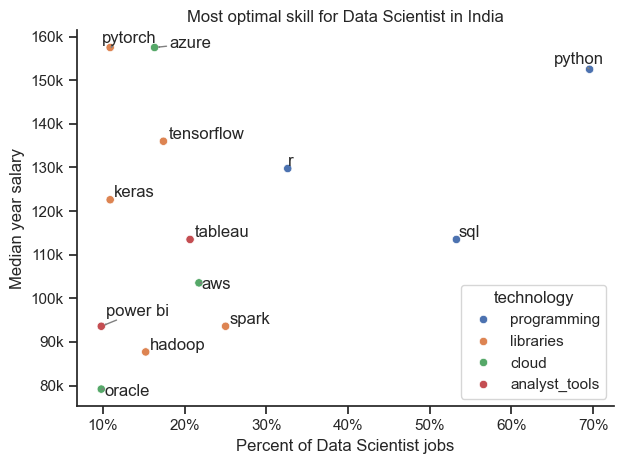

In [63]:

# df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')

sns.scatterplot(
     data=df_plot,
     y='median_salary',
     x='skill_percent',
     hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(
        df_da_skills_high_demand['skill_percent'].iloc[i],  # X-coordinate
        df_da_skills_high_demand['median_salary'].iloc[i],  # Y-coordinate
        txt  # The text to annotate (from index)
    ))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title('Most optimal skill for Data Scientist in India')
plt.xlabel('Percent of Data Scientist jobs')
plt.ylabel('Median year salary')


from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()
